# SGA-PMX Demo

Skrypt przedstawia przykładową implementację algorytmu Simple Genetic Algorithm (SGA) z operatorem PMX i jego zastosowanie do rozwiązywania problemu komiwojażera (ang. Travelling Salesman Problem, TSP). Popularne instancje problemu TSP można znaleźć w bibliotece TSPLib [1]. Skrypt skupia się na rozwiązywaniu instancji BERLIN52, w celu rozwiązywania innych instancji może okazać się konieczna zmiana ustawień parametrów algorytmu, a może też i operatorów ewolucyjnych.

Literatura:

[1] TSPLIB, http://comopt.ifi.uni-heidelberg.de/software/TSPLIB95/

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import time

%matplotlib inline

## Input data

In [2]:
# BERLIN52

n = 52
print('Problem size: %d' % n)

coords = np.array([565.0, 575.0, 25.0, 185.0, 345.0, 750.0, 945.0, 685.0, 845.0, 655.0, 880.0, 660.0, 25.0, 230.0, 525.0, 1000.0, 580.0, 1175.0, 650.0, 1130.0, 1605.0, 620.0, 1220.0, 580.0, 1465.0, 200.0, 1530.0, 5.0, 845.0, 680.0, 725.0, 370.0, 145.0, 665.0, 415.0, 635.0, 510.0, 875.0, 560.0, 365.0, 300.0, 465.0, 520.0, 585.0, 480.0, 415.0, 835.0, 625.0, 975.0, 580.0, 1215.0, 245.0, 1320.0, 315.0, 1250.0, 400.0, 660.0, 180.0, 410.0, 250.0, 420.0, 555.0, 575.0, 665.0, 1150.0, 1160.0, 700.0, 580.0, 685.0, 595.0, 685.0, 610.0, 770.0, 610.0, 795.0, 645.0, 720.0, 635.0, 760.0, 650.0, 475.0, 960.0, 95.0, 260.0, 875.0, 920.0, 700.0, 500.0, 555.0, 815.0, 830.0, 485.0, 1170.0, 65.0, 830.0, 610.0, 605.0, 625.0, 595.0, 360.0, 1340.0, 725.0, 1740.0, 245.0])
coords = coords.reshape(n, 2)

A = np.empty((n, n))
for i in range(n):
    for j in range(n):
        A[i, j] = np.sqrt(((coords[i, :] - coords[j, :])**2).sum())
print('Distance matrix:\n', A)

p = [0, 48, 31, 44, 18, 40,  7,  8,  9, 42, 32, 50, 10, 51, 13, 12, 46, 25, 26, 27, 11, 24,  3,  5, 14,  4, 23, 47, 37, 36, 39, 38, 35, 34, 33, 43, 45, 15, 28, 49, 19, 22, 29,  1,  6, 41, 20, 16,  2, 17, 30, 21]
print('Optimal solution:\n', p)

Problem size: 52
Distance matrix:
 [[    0.           666.10809934   281.11385594 ...,   217.08293346
    789.38267019  1220.46097848]
 [  666.10809934     0.           649.32657423 ...,   596.25917184
   1421.55724471  1716.04924172]
 [  281.11385594   649.32657423     0.         ...,   463.24939288
    995.3140208   1483.59361012]
 ..., 
 [  217.08293346   596.25917184   463.24939288 ...,     0.           829.60834133
   1150.76061803]
 [  789.38267019  1421.55724471   995.3140208  ...,   829.60834133     0.
    624.81997407]
 [ 1220.46097848  1716.04924172  1483.59361012 ...,  1150.76061803
    624.81997407     0.        ]]
Optimal solution:
 [0, 48, 31, 44, 18, 40, 7, 8, 9, 42, 32, 50, 10, 51, 13, 12, 46, 25, 26, 27, 11, 24, 3, 5, 14, 4, 23, 47, 37, 36, 39, 38, 35, 34, 33, 43, 45, 15, 28, 49, 19, 22, 29, 1, 6, 41, 20, 16, 2, 17, 30, 21]


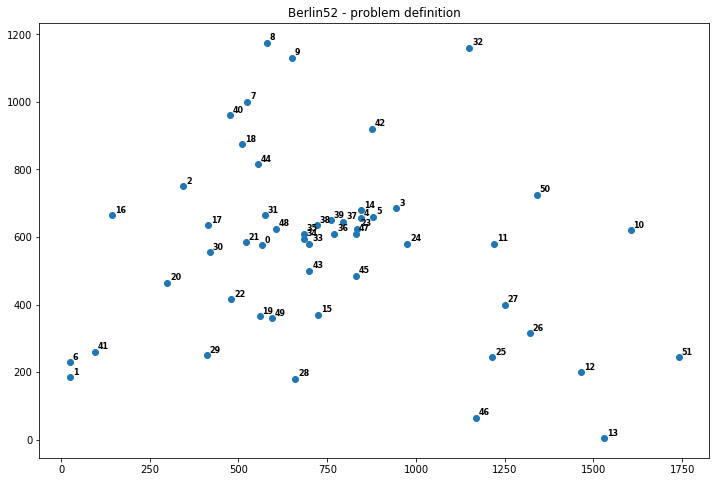

In [3]:
plt.figure(figsize=(12,8))

plt.plot(coords[:, 0], coords[:, 1], 'o')

for i in range(n):
    plt.text(coords[i, 0]+8, coords[i, 1]+8, str(i), fontdict={'weight':'bold', 'size':8})

plt.title('Berlin52 - problem definition')

plt.show()

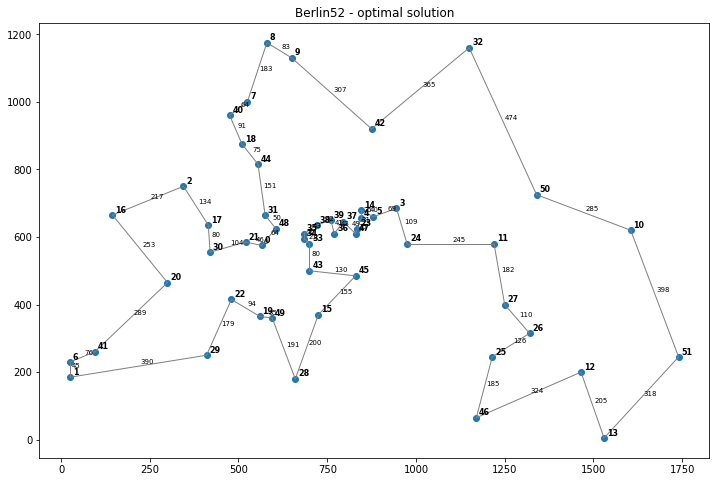

In [4]:
from matplotlib.lines import Line2D

route = p

plt.figure(figsize=(12,8))
fig, ax = plt.subplots(figsize=(12,8))

plt.plot(coords[:, 0], coords[:, 1], 'o')

for i in range(n):
    plt.text(coords[i, 0]+8, coords[i, 1]+8, str(i), fontdict={'weight':'bold', 'size':8})

ax.add_line(Line2D(
    [coords[0, 0], coords[route[0], 0]],
    [coords[0, 1], coords[route[0], 1]],
    linewidth=1, color='gray'))
plt.text((coords[0, 0] + coords[route[0], 0])/2 + 6,
         (coords[0, 1] + coords[route[0], 1])/2 + 6,
         '%d' % A[0, route[0]], fontdict={'weight':'normal', 'size':7})
for i in range(1, len(route)):
    ax.add_line(Line2D(
        [coords[route[i-1], 0], coords[route[i], 0]],
        [coords[route[i-1], 1], coords[route[i], 1]],
        linewidth=1, color='gray'))
    plt.text((coords[route[i-1], 0] + coords[route[i], 0])/2 + 6,
             (coords[route[i-1], 1] + coords[route[i], 1])/2 + 6,
             '%d' % A[route[i-1], route[i]], fontdict={'weight':'normal', 'size':7})
ax.add_line(Line2D(
    [coords[route[-1], 0], coords[0, 0]],
    [coords[route[-1], 1], coords[0, 1]],
    linewidth=1, color='gray'))
plt.text((coords[route[-1], 0] + coords[0, 0])/2 + 6,
         (coords[route[-1], 1] + coords[0, 1])/2 + 6,
         '%d' % A[route[-1], 0], fontdict={'weight':'normal', 'size':7})

plt.title('Berlin52 - optimal solution')

plt.show()

## Objective function

In [5]:
def tsp_objective_function(p):
    s = 0.0
    for i in range(n):
        s += A[p[i-1], p[i]]
    return s

In [6]:
print(tsp_objective_function(p), p)

7544.3659019 [0, 48, 31, 44, 18, 40, 7, 8, 9, 42, 32, 50, 10, 51, 13, 12, 46, 25, 26, 27, 11, 24, 3, 5, 14, 4, 23, 47, 37, 36, 39, 38, 35, 34, 33, 43, 45, 15, 28, 49, 19, 22, 29, 1, 6, 41, 20, 16, 2, 17, 30, 21]


## Random Sampling

In [7]:
t0 = time.time()

T = 1000000

permutations = np.empty((T, n), dtype=np.int64)
costs = np.zeros(T)
for i in range(T):
    permutations[i, :] = np.random.permutation(n)
    costs[i] = tsp_objective_function(permutations[i, :])

print(time.time() - t0)

p = permutations[costs.argmin(), :]
print(tsp_objective_function(p), p)

42.270999908447266
21785.7986805 [29  6 21 35  7 18  2  0 30 41 22 19 20  1 17  8 33 44 24 40 47 31 36 23 43
 15 32 45 34 38 14 39  5  9 49 48 11 50  4 42 12 28 51 10  3 16 37 27 25 13
 46 26]


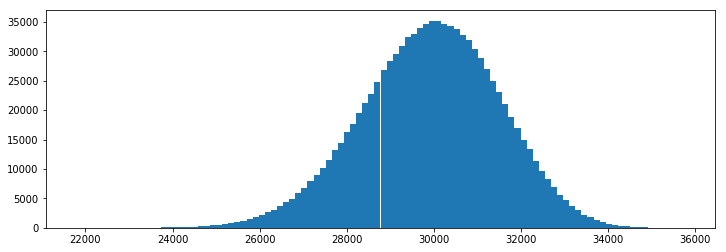

29916.5052699 1578.60276838


In [8]:
plt.figure(figsize=(12,4))
plt.hist(costs, bins=100)
plt.show()

print(costs.mean(), costs.std())

## Simulated Annealing

In [9]:
def random_neighbor(p, radius):
    q = p.copy()
    for r in range(radius):
        i, j = np.random.choice(n, 2, replace=False)
        q[i], q[j] = q[j], q[i]
    return q

In [10]:
T = 500000
radius = 1
alpha = 1.0

t0 = time.time()

p = np.random.permutation(n)
p_cost = tsp_objective_function(p)
costs = np.zeros(T)
for t in range(T):
    q = random_neighbor(p, radius)
    q_cost = tsp_objective_function(q)
    if(q_cost < p_cost):
        p, p_cost = q, q_cost
    elif(np.random.rand() < np.exp(- alpha * (q_cost - p_cost) * t/T)):
        p, p_cost = q, q_cost
    costs[t] = p_cost

print(time.time() - t0, costs.min())

30.25100016593933 9329.95320462


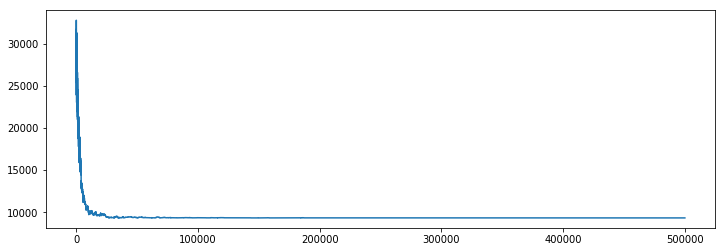

In [11]:
plt.figure(figsize=(12,4))
plt.plot(costs)
plt.show()

## SGA-PMX

In [ ]:
def PMX(ind1, ind2):
    gene=np.random.randint(0,len(ind1),2)
    start=min(gene)
    end=max(gene)
    child1=np.zeros(len(ind1))-1
    child2=np.zeros(len(ind1))-1
    child1[start:end]=ind2[start:end]
    child2[start:end]=ind1[start:end]
    
    for index, x in np.ndenumerate(ind1[start:end]):
        if x not in child1[start:end]:
            child1[np.where(ind2=x)]

    for ind,pos in enumerate(ind1[start:end]):
        if ind not in child1[start:end]:
            
    return ind1, ind2

In [ ]:
def correct_genes(parent,child,start,end):
    for index, x in np.ndenumerate(parent[start:end]):
        if x not in child1[start:end]:
            np.where(parent==child[index])


def PMX(ind1, ind2):
    gene=np.random.randint(0,len(ind1),2)
    start=min(gene)
    end=max(gene)
    child1=np.copy(ind1)
    child2=np.copy(ind2)
    child1[start:end]=ind2[start:end]
    child2[start:end]=ind1[start:end]

return child1, child2


In [ ]:
def PMX(ind1, ind2):
    gene=np.random.randint(1,len(ind1),2)
    start=min(gene)-1
    end=max(gene)
    ordering1=np.zeros(len(ind1))
    ordering2=np.zeros(len(ind1))
    # ordering1=np.arange(len(ind1))
    # ordering2=np.arange(len(ind1))

    # the genes are numerical and distinct, so this is fine to avoid searching later
    for index, x in np.ndenumerate(ind1):
        ordering1[x]=index
    for index, x in np.ndenumerate(ind2):
        ordering2[x]=index
    
    #we swich the gene while remembering the ordering change

    for index, x in np.ndenumerate(ind1[start:end]):
        
        ind1[index],ind2[index]=ind2[index],ind1[index]

    
    print(ordering1,ordering2)

In [3]:
import numpy as np
a=np.array([5,5,5,5,5,5,5,5,5,5])
PMX(a,a)

[0 1 2 3 4 5 6 7 8 9] [0 1 2 3 4 5 6 7 8 9]


In [13]:
def reverse_sequence_mutation(p):
    a = np.random.choice(len(p), 2, False)
    i, j = a.min(), a.max()
    q = p.copy()
    q[i:j+1] = q[i:j+1][::-1]
    return q

In [14]:
population_size = 500
chromosome_length = n
number_of_offspring = population_size
crossover_probability = 0.95
mutation_probability = 0.25
number_of_iterations = 250

time0 = time.time()

best_objective_value = np.Inf
best_chromosome = np.zeros((1, chromosome_length))

# generating an initial population
current_population = np.zeros((population_size, chromosome_length), dtype=np.int64)
for i in range(population_size):
    current_population[i, :] = np.random.permutation(chromosome_length)

# evaluating the objective function on the current population
objective_values = np.zeros(population_size)
for i in range(population_size):
    objective_values[i] = tsp_objective_function(current_population[i, :])

for t in range(number_of_iterations):

    # selecting the parent indices by the roulette wheel method
    fitness_values = objective_values.max() - objective_values
    if fitness_values.sum() > 0:
        fitness_values = fitness_values / fitness_values.sum()
    else:
        fitness_values = np.ones(population_size) / population_size
    parent_indices = np.random.choice(population_size, number_of_offspring, True, fitness_values).astype(np.int64)

    # creating the children population
    children_population = np.zeros((number_of_offspring, chromosome_length), dtype=np.int64)
    for i in range(int(number_of_offspring/2)):
        if np.random.random() < crossover_probability:
            #I'm changing the copying behaviour since it isn't in place anyway, i will just create new ndarrays in the function
            children_population[2*i, :], children_population[2*i+1, :] = PMX(current_population[parent_indices[2*i], :], current_population[parent_indices[2*i+1], :])
        else:
            children_population[2*i, :], children_population[2*i+1, :] = current_population[parent_indices[2*i], :].copy(), current_population[parent_indices[2*i+1]].copy()
    if np.mod(number_of_offspring, 2) == 1:
        children_population[-1, :] = current_population[parent_indices[-1], :]

    # mutating the children population
    for i in range(number_of_offspring):
        if np.random.random() < mutation_probability:
            children_population[i, :] = reverse_sequence_mutation(children_population[i, :])

    # evaluating the objective function on the children population
    children_objective_values = np.zeros(number_of_offspring)
    for i in range(number_of_offspring):
        children_objective_values[i] = tsp_objective_function(children_population[i, :])

    # replacing the current population by (Mu + Lambda) Replacement
    objective_values = np.hstack([objective_values, children_objective_values])
    current_population = np.vstack([current_population, children_population])

    I = np.argsort(objective_values)
    current_population = current_population[I[:population_size], :]
    objective_values = objective_values[I[:population_size]]

    # recording some statistics
    if best_objective_value < objective_values[0]:
        best_objective_value = objective_values[0]
        best_chromosome = current_population[0, :]

    print('%3d %14.8f %12.8f %12.8f %12.8f %12.8f' % (t, time.time() - time0, objective_values.min(), objective_values.mean(), objective_values.max(), objective_values.std()))

  0     0.04699993 24964.81600321 28448.19109047 29735.88772161 1003.74797641
  1     0.07399988 23144.93826132 27588.97410282 28740.61067907 907.31888916
  2     0.10000014 23144.93826132 26970.23988763 28021.96527908 807.93651039
  3     0.12699986 23144.93826132 26461.26918515 27410.98469899 730.43063554
  4     0.15300012 23129.48209390 26091.99626286 26947.46333276 691.09793276
  5     0.17799997 21477.09824545 25714.42953781 26536.78142028 679.17314947
  6     0.20499992 21477.09824545 25330.48665796 26133.02940188 673.67108528
  7     0.23099995 21477.09824545 24963.01727292 25796.34828420 754.68972734
  8     0.25699997 20990.36850812 24570.79530123 25453.41372432 848.87623319
  9     0.28699994 20762.06471098 24116.25143862 25092.54614284 918.86072463
 10     0.31499982 20657.46692039 23549.94792303 24724.87213980 998.26974922
 11     0.34200001 20631.28628172 22881.11414313 24101.44148387 884.00113780
 12     0.36800003 20309.11931081 22245.65387059 23205.28856972 643.3112679

112     3.08800006 8121.78771976 8157.96098570 8168.59343343  10.84128333
113     3.11800003 8096.52814806 8149.23107901 8162.22769636  13.69684553
114     3.14400005 8096.52814806 8136.56301120 8147.87941540  13.83986145
115     3.16999984 8044.72421801 8119.44079364 8121.78771976   6.76945100
116     3.19700003 8030.37593705 8105.85366511 8121.78771976  12.84884375
117     3.22399998 8030.37593705 8096.99135051 8107.43943881  17.40829328
118     3.25099993 8019.46464630 8073.40384240 8096.52814806  27.92817569
119     3.27799988 8019.46464630 8039.17786610 8044.72421801   7.25220603
120     3.30599999 8011.17694632 8029.37954263 8030.37593705   3.17858342
121     3.33399987 8011.17694632 8021.78355831 8030.37593705   5.17980101
122     3.36100006 7990.76797519 8017.98829232 8019.46464630   3.64629749
123     3.38800001 7987.17332513 8010.70696664 8019.46464630   5.15591677
124     3.41499996 7950.77133689 8007.42287218 8011.17694632   5.99620442
125     3.44099998 7915.73244254 7999.

224     6.12100005 7853.49114817 7853.49114817 7853.49114817   0.00000000
225     6.14899993 7853.49114817 7853.49114817 7853.49114817   0.00000000
226     6.17600012 7853.49114817 7853.49114817 7853.49114817   0.00000000
227     6.20400000 7853.49114817 7853.49114817 7853.49114817   0.00000000
228     6.23099995 7853.49114817 7853.49114817 7853.49114817   0.00000000
229     6.25699997 7853.49114817 7853.49114817 7853.49114817   0.00000000
230     6.28400016 7853.49114817 7853.49114817 7853.49114817   0.00000000
231     6.31099987 7853.49114817 7853.49114817 7853.49114817   0.00000000
232     6.33800006 7853.49114817 7853.49114817 7853.49114817   0.00000000
233     6.36699986 7853.49114817 7853.49114817 7853.49114817   0.00000000
234     6.39400005 7853.49114817 7853.49114817 7853.49114817   0.00000000
235     6.42100000 7853.49114817 7853.49114817 7853.49114817   0.00000000
236     6.44699979 7853.49114817 7853.49114817 7853.49114817   0.00000000
237     6.47300005 7853.49114817 7853.